# Basic Imports

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.manifold.t_sne import TSNE
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import random

# Seed set for Reproducibility

In [0]:
np.random.seed(123)

# Generating 2D data from Uniform Distribution ~ U(-1,1) x U(-1,1)

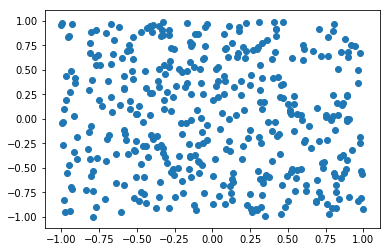

In [3]:
x = np.random.uniform(-1,1,(400,2))
plt.scatter(x[:,0],x[:,1])
plt.show()

# Creating label : y = sign(x1^2 + x2^2 - 0.5)

In [0]:
y=[]
for i in range(x.shape[0]):
    y.append(np.sign(x[i][0]**2 + x[i][1]**2 - 0.5))

#  Visualizing data points

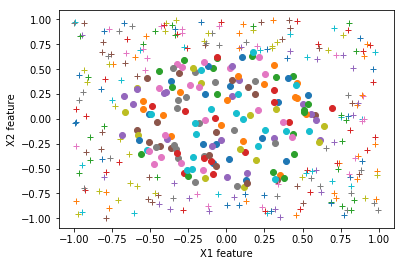

In [0]:
x1=x[:,0]
x2=x[:,1]
x1=x1.tolist()
x2=x2.tolist()
for i in range(len(y)):
    if y[i]==1:
        plt.plot(x1[i],x2[i],'+')
    else:
        
        plt.plot(x1[i],x2[i],'o')
plt.xlabel('X1 feature')
plt.ylabel('X2 feature')
plt.show()

In [0]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy= np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [0]:
def plot_contours(ax, logr, xx, yy,**params):
    #print(np.c_[xx.ravel(), yy.ravel()].shape)
    Z = logr.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel() Flattens an array
    #print(Z)
    Z = Z.reshape(xx.shape)
    #print(Z.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Visualize the decision boundary with 2 features (x1 , x2)

In [0]:
def two_features_fixed_size(x,y):
    
    #if mode is False: #Test set is formed
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109) #Train set = 70%, Test set = 30%
    y_train=np.asarray(y_train)
    y_test=np.asarray(y_test)
        
        
    #LogisticRegression class type object is created    
    logreg = LogisticRegression()
    #Trained on X_train
    logr = logreg.fit(X_train,y_train)
    
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of linear logistic regression in training set ')
    # Set-up grid for plotting.
    X0, X1 = X_train[:, 0], X_train[:, 1]
    xx, yy = make_meshgrid(X0, X1)
   
    plot_contours(ax, logr, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8) #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

    plt.show()
    
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of linear logistic regression in test set ')
    # Set-up grid for plotting.
    X0, X1 = X_test[:, 0], X_test[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, logr, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

    plt.show()

    #Predict on test/training set based on 'mode'
    #y_pred = logr.predict_proba(x) #Predicted probabilties obtained
    #print'Log Loss: ',log_loss(y,y_pred) #Calculates log loss : -log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp)) where yt is ground truth and yp is predicted probability
    print('Mean Train Accuracy:', logr.score(X_train,y_train))
    print('Mean Test Accuracy:', logr.score(X_test,y_test))

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


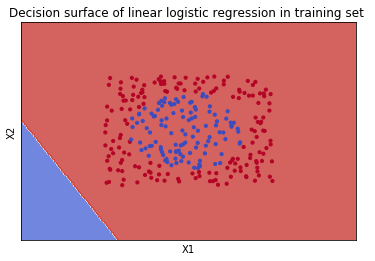

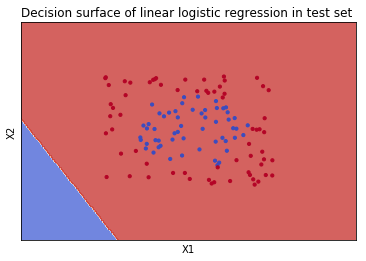

('Mean Train Accuracy:', 0.5964285714285714)
('Mean Test Accuracy:', 0.5416666666666666)


In [8]:
#This function introduces LogisticRegression and helps to visualize decision boundary
# x = (x1, x2) ; y = {+1, -1}
two_features_fixed_size(x,y) #using x and y as features

# Visualize the decision boundary with 2 features (x1^2, x2^2)

In [0]:
def two_quadfeatures_fixed_size(x,y):
    
    #if mode is False: #Test set is formed
    
    for i in range(x.shape[0]): #Replace x1 and x2 with the feature values (x1^2 and x2^2)
        x[i][0]=x[i][0]**2
        x[i][1]=x[i][1]**2
        
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109) #Train set = 70%, Test set = 30%
    y_train=np.asarray(y_train)
    y_test=np.asarray(y_test)
              
    #LogisticRegression class type object is created    
    logreg = LogisticRegression()
    #Trained on X_train
    logr = logreg.fit(X_train,y_train)
    
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of linear logistic regression in training set ')
    # Set-up grid for plotting.
    X0, X1 = X_train[:, 0], X_train[:, 1]
    xx, yy = make_meshgrid(X0, X1)
   
    plot_contours(ax, logr, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8) #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

    plt.show()
    
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of linear logistic regression in test set ')
    # Set-up grid for plotting.
    X0, X1 = X_test[:, 0], X_test[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, logr, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

    plt.show()

    #Predict on test/training set based on 'mode'
    #y_pred = logr.predict_proba(x) #Predicted probabilties obtained
    #print'Log Loss: ',log_loss(y,y_pred) #Calculates log loss : -log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp)) where yt is ground truth and yp is predicted probability
    print('Mean Train Accuracy:', logr.score(X_train,y_train))
    print('Mean Test Accuracy:', logr.score(X_test,y_test))

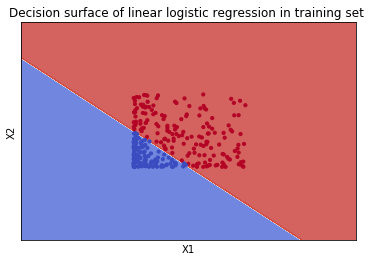

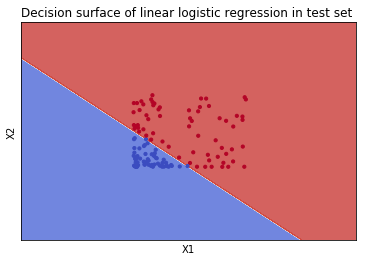

('Mean Train Accuracy:', 0.9928571428571429)
('Mean Test Accuracy:', 1.0)


In [10]:
#This function introduces LogisticRegression and helps to visualize decision boundary
# x = (x1^2, x2^2) ; y = {+1, -1}
two_quadfeatures_fixed_size(x,y) #using x and y as features


# Using 2 features (x1, x2) and 4 features (x1,x2,x1^2, x2^2) in our data

In [0]:
def variable_size(features):
    
    loss=[]
    samples=[]
    acc_train=[]
    acc_test=[]
    
    if features == 2:
      
        for i in range(20,5000,20):
            np.random.seed(123)
            x = np.random.uniform(-1,1,(i,2))
            y=[]
            for i in range(x.shape[0]):
                y.append(np.sign(x[i][0]**2 + x[i][1]**2 - 0.5)) #Forming y = (x1^2 + x2^2 - 0.5)

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109) #Train set = 70%, Test set = 30%
            y_train=np.asarray(y_train)
            y_test=np.asarray(y_test)
    
            logreg = LogisticRegression() 
            logreg.fit(X_train,y_train)

            #ypred = logreg.predict_proba(x)
            #loss.append(log_loss(y,ypred))
            acc_train.append(logreg.score(X_train,y_train))
            acc_test.append(logreg.score(X_test,y_test))
            samples.append(i)
        
        #Plot Log Loss and Mean Accuracy
        #plt.plot(samples,loss)
        #plt.xlabel('Number of training samples using 2 features')
        #plt.ylabel('Log Loss')
        #plt.show()
            
        plt.plot(samples,acc_train,'b-',label='Train Accuracy')
        plt.plot(samples,acc_test,'r-',label='Test Accuracy')
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlabel('Number of training samples using 2 features',fontsize=15)
        plt.ylabel('Mean Accuracy',fontsize=15)
        plt.title(str(features)+' features',fontsize=15)
        plt.legend(fontsize=20)
        axes = plt.gca()
        axes.set_ylim([0.4,1])
        plt.show()
            
    else:
        # Forming the additional columns for 4 features
        for i in range(20,5000,20):
            np.random.seed(123)
            x = np.random.uniform(-1,1,(i,2))
            x=np.c_[x,np.ones(x.shape[0]),np.ones(x.shape[0])] #Append 2 columns of all ones
            for i in range(x.shape[0]): #Replace the ones with the feature values (x1^2 and x2^2)
                x[i][2]=x[i][0]**2
                x[i][3]=x[i][1]**2

            y=[]
            for i in range(x.shape[0]):
                y.append(np.sign(x[i][0]**2 + x[i][1]**2 - 0.5))  #Forming y = (x1^2 + x2^2 - 0.5)
                
            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109)
            y_train=np.asarray(y_train)
            y_test=np.asarray(y_test)
            
            logreg = LogisticRegression()
            logreg.fit(X_train,y_train)
            #ypred = logreg.predict_proba(x)
            #loss.append(log_loss(y,ypred))
            acc_train.append(logreg.score(X_train,y_train))
            acc_test.append(logreg.score(X_test,y_test))
            samples.append(i)
            
        #plt.plot(samples,loss)
        #plt.xlabel('Number of training samples using 4 features')
        #plt.ylabel('Log Loss')
        #plt.show()
            
        plt.plot(samples,acc_train,'b-',label='Train Accuracy')
        plt.plot(samples,acc_test,'r-',label='Test Accuracy')
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlabel('Number of training samples using 4 features',fontsize=15)
        plt.ylabel('Mean Accuracy',fontsize=15)
        plt.title(str(features)+' features',fontsize=15)
        plt.legend(fontsize=20)
        axes = plt.gca()
        axes.set_ylim([0.4,1])
        plt.show()

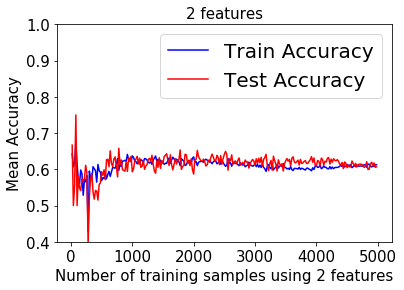

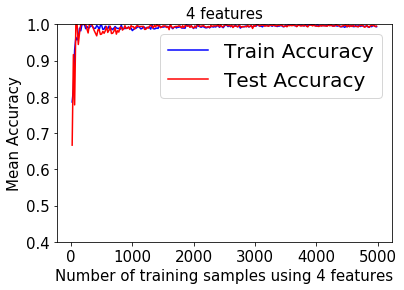

In [12]:
#This function plots train and test accuracy.
#If features = 2, only x1 and x2 are used; If features = 4, x1, x2, x1^2, x2^2 are used
variable_size(features = 2)
variable_size(features = 4)

# Flip and Run

In [0]:
def flip_split_run(x,y):
    
    acc_train=[]
    acc_test=[]
    samples=[]
    
    x=np.c_[x,np.ones(x.shape[0]),np.ones(x.shape[0])] #Append 2 columns of all ones
    for i in range(x.shape[0]): #Replace the ones with the feature values (x1^2 and x2^2)
        x[i][2]=x[i][0]**2
        x[i][3]=x[i][1]**2
   
    y=np.asarray(y)
    #Run for various splits with correct data
    for k in np.arange(0.5,1.0,0.05):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1.0-k,random_state=123,shuffle=False)
        logreg = LogisticRegression() 
        logreg.fit(X_train,y_train)
        acc_train.append(logreg.score(X_train,y_train))
        acc_test.append(logreg.score(X_test,y_test))
        samples.append(k)
    
    
    plt.plot(samples,acc_train,'bo-',label='Train Accuracy')
    plt.plot(samples,acc_test,'ro-',label='Test Accuracy')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('Proportion of training samples using 4 features',fontsize=15)
    plt.ylabel('Mean Accuracy',fontsize=15)
    plt.legend(fontsize=15)
    plt.title('Without noise',fontsize=15)
    axes = plt.gca()
    axes.set_ylim([0.8,1])
    plt.show()
    
    ####################################################################################
    #Generate noisy data
    acc_train=[]
    acc_test=[]
    samples=[]
    
    num = int(0.05 * len(y)) #5% of data to be flipped
    np.random.seed(123)
    changeind = np.random.choice(len(y),num,replace=False) #Sampling without replacement
    #For example, np.random.choice(5,3) = ([0,2,3]); first argument is the limit till which we intend to pick up elements, second is the number of elements to be sampled
    #Creating a copy of the array to modify
    yc=np.copy(y)
    
    #Flip labels
    for i in changeind:
        if yc[i]==-1.0:
            yc[i]=1.0
        else:
            yc[i]=-1.0
    
    for k in np.arange(0.5,0.99,0.05):
        X_trainf, X_testf, y_trainf, y_testf = train_test_split(x, yc, test_size=1.0-k,random_state=123,shuffle =False)
        logreg = LogisticRegression() 
        logreg.fit(X_trainf,y_trainf)
        acc_train.append(logreg.score(X_trainf,y_trainf))
        acc_test.append(logreg.score(X_testf,y_testf))
        samples.append(k)
    
    
    plt.plot(samples,acc_train,'bo-',label='Train Accuracy')
    plt.plot(samples,acc_test,'ro-',label='Test Accuracy')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('Proportion of training samples using 4 features',fontsize=15)
    plt.ylabel('Mean Accuracy',fontsize=15)
    plt.legend(fontsize=15)
    plt.title('With noise',fontsize=15)
    axes = plt.gca()
    axes.set_ylim([0.8,1])
    plt.show()

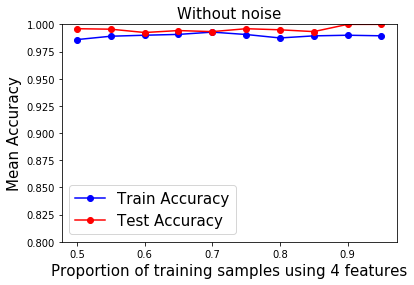

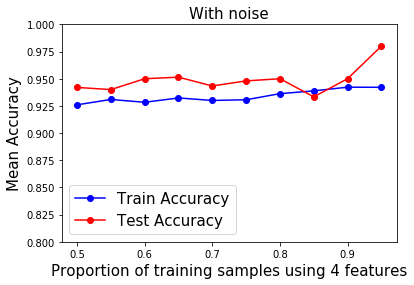

In [14]:
np.random.seed(random.randint(1,100))
x = np.random.uniform(-1,1,(1000,2))
y=[]
for i in range(x.shape[0]):
    y.append(np.sign(x[i][0]**2 + x[i][1]**2 - 0.5))

flip_split_run(x,y)

In [15]:
import sklearn
sklearn.__version__

'0.20.3'

# Basic of some inbuilt functions

# Creating a meshgrid

![Screen%20Shot%202019-06-16%20at%201.19.15%20AM.png](attachment:Screen%20Shot%202019-06-16%20at%201.19.15%20AM.png)

Image courtesy: https://www.python-course.eu/matplotlib_contour_plot.php

X 

[0.  0.5 1. ]
Y 

[0.  0.5 1. ]
XX 

[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]]
YY 

[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]
All possible set of points
[[0.  0. ]
 [0.5 0. ]
 [1.  0. ]
 [0.  0.5]
 [0.5 0.5]
 [1.  0.5]
 [0.  1. ]
 [0.5 1. ]
 [1.  1. ]]


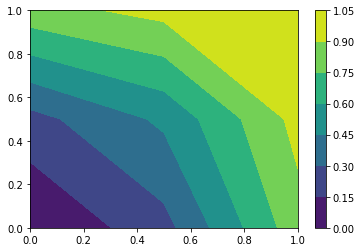

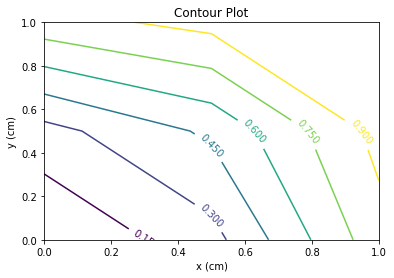

In [16]:
import numpy as np
nx, ny = (3,3) #tuple
x = np.linspace(0,1,nx) #returns nx number of equispaced values within the start = 0 and end = 1 value
y = np.linspace(0,1,ny)
print('X \n')
print(x)
print('Y \n')
print(y)
xx, yy = np.meshgrid(x,y) #creates meshgrid
print('XX \n')
print(xx)
print('YY \n')
print(yy)
print('All possible set of points')
print(np.c_[xx.ravel(),yy.ravel()])
z=np.sin(xx**2 + yy**2)
h=plt.contourf(x,y,z) #plot contour
plt.colorbar()
plt.show()

plt.figure()
cp = plt.contour(x, y, z)
plt.clabel(cp, inline=True, 
          fontsize=10) #label a contour plot
plt.title('Contour Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

In [17]:
x = np.array([[1, 2, 3], [4, 5, 6]])
print(np.ravel(x))

[1 2 3 4 5 6]


In [18]:
np.random.seed(4)
print(np.random.rand(3))

[0.96702984 0.54723225 0.97268436]


In [19]:
print(np.random.rand(3))

[0.71481599 0.69772882 0.2160895 ]


In [20]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
tn

0

In [21]:
np.arange(0,1,0.2)

array([0. , 0.2, 0.4, 0.6, 0.8])